# Working with image data
- Reading and manipulating image colorspaces
- Flattening images

In [ ]:
import os
import cv2
import numpy as np
data_dir='Z:\ML Course\Working With Image Data\Data'
os.chdir(data_dir)

## Reading Images: Use opencv on python3.5/2.7

In [ ]:
## Reading images
im=cv2.imread("kitty.jpg")

In [ ]:
type(im)

In [ ]:
im.shape

In [ ]:
## OpenCV always treats images in BGR color space, so 
im[:,:,0] # is the part corresponding to blue space


In [ ]:
im[:,:,1] # is the part corresponding to green space

In [ ]:
im[:,:,2] # is the part corresponding to red space

In [ ]:
## We can convert an image from BGR space to RGB space or Grayscale space
im_rgb=cv2.cvtColor(im,cv2.COLOR_BGR2RGB)

In [ ]:
im_grayscale=cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)

In [ ]:
print(im_rgb.shape)

In [ ]:
print(im_grayscale.shape) #Notice there is only a single channel

In [ ]:
## We can also visualize these numpy arrays using matplotlib
import matplotlib.pyplot as plt
% matplotlib inline

In [ ]:
# We can use the imshow() function to display images
plt.imshow(im_rgb)

In [ ]:
plt.imshow(im_grayscale)

In [ ]:
## imshow() has to be explicitly told, that we are in a grayspace color space by using cmap parameter
plt.imshow(im_grayscale,cmap="gray")

In [ ]:
## We can resize images, photos captured by modern devices have very large resolution, doing machine 
# learning on these images can be computationally expensive, we can resize an image to reduce the 
# number of data points we have to work with
im_resized=cv2.resize(im_grayscale,(500,500),cv2.INTER_LINEAR)

In [ ]:
im_resized

In [ ]:
plt.imshow(im_resized,cmap="gray")

In [ ]:
im_resized.shape

In [ ]:
## Every image will be an array and can be indexed like one
im_resized[0:400:,]

In [ ]:
plt.imshow(im_resized[0:400:,],cmap="gray")

In [ ]:
im_resized[:,0:200]

In [ ]:
plt.imshow(im_resized[:,0:200],cmap="gray")

# Flattening Images

In [28]:
### Flattening images
five=cv2.imread("five.jpg")

In [29]:
five.shape

(225, 225, 3)

In [30]:
seven=cv2.imread("seven.png")
two=cv2.imread("two.jpg")

In [31]:
print(seven.shape)
print(two.shape)

(225, 225, 3)
(225, 224, 3)


In [32]:
## We will need to convert them to grayscale
f_g=cv2.cvtColor(five,cv2.COLOR_BGR2GRAY)
s_g=cv2.cvtColor(seven,cv2.COLOR_BGR2GRAY)
t_g=cv2.cvtColor(two,cv2.COLOR_BGR2GRAY)

In [33]:
print(f_g.shape)
print(s_g.shape)
print(t_g.shape)

(225, 225)
(225, 225)
(225, 224)


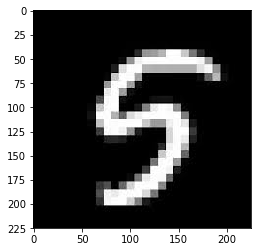

In [34]:
# Let's plot them
plt.imshow(f_g,cmap="gray")

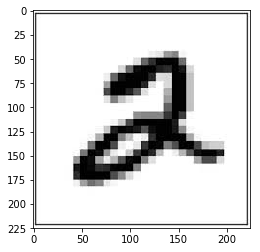

In [35]:
plt.imshow(t_g,cmap="gray")

In [36]:
## We may want to resize them to same size
f_g_r=cv2.resize(f_g,(100,100),cv2.INTER_LINEAR)
s_g_r=cv2.resize(s_g,(100,100),cv2.INTER_LINEAR)
t_g_r=cv2.resize(t_g,(100,100),cv2.INTER_LINEAR)

In [37]:
print(f_g_r.shape)
print(s_g_r.shape)
print(t_g_r.shape)

(100, 100)
(100, 100)
(100, 100)


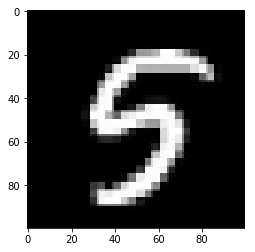

In [38]:
plt.imshow(f_g_r,cmap="gray")

In [39]:
f_flat=f_g_r.reshape(100*100)

In [40]:
s_flat=s_g_r.reshape(100*100)
t_flat=t_g_r.reshape(100*100)

In [41]:
f_flat

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [42]:
f_flat.shape

(10000,)

In [43]:
## Lets stack them together
flattened_images=np.stack([f_flat,s_flat,t_flat],axis=0)

In [44]:
flattened_images.shape

(3, 10000)

In [45]:
flattened_images[0,:] # First image

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

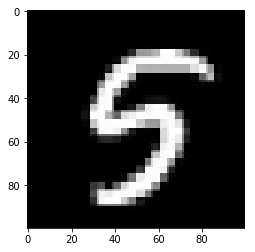

In [46]:
## What if I want to plot this flattened image, I can use reshape method!!!
plt.imshow(flattened_images[0,:].reshape((100,100)),cmap="gray")

In [47]:
## We can write out the flattened images as a csv file as well
import pandas as pd
flattened_dataframe=pd.DataFrame(flattened_images)

In [48]:
flattened_dataframe.to_csv("flattened_images.csv",index=False)